# Proyecto Final
## Integrantes :

* ## Camilo Andres Caiman Urquijo -20181020086
* ## Johan Andres Aguirre Diaz -20181020072 


In [52]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from keras.layers.advanced_activations import LeakyReLU
import numpy as np


# Librería para graficar 
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
import itertools


# Preparacion de Datos

In [13]:
ruta_dataset_entrenamiento = "/Users/usuario/OneDrive/Documentos/semestre 2021-3/ciencias de datos/final/sportimages_train"
ruta_dataset_prueba = "/Users/usuario/OneDrive/Documentos/semestre 2021-3/ciencias de datos/final/sportimages_test"
ruta_dataset_validacion = "/Users/usuario/OneDrive/Documentos/semestre 2021-3/ciencias de datos/final/sportimages_validation"
num_classes = 3

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
train_generator = train_datagen.flow_from_directory(ruta_dataset_entrenamiento,target_size=(21,28),color_mode="rgb",class_mode='categorical',batch_size=34,shuffle=False)
test_generator = test_datagen.flow_from_directory(ruta_dataset_prueba,color_mode="rgb",target_size=(21,28),class_mode='categorical',batch_size=1,shuffle=False)
validation_generator=validation_datagen.flow_from_directory(ruta_dataset_validacion,target_size=(21,28),color_mode="rgb",class_mode='categorical',batch_size=34,shuffle=False)

Found 13260 images belonging to 3 classes.
Found 4419 images belonging to 3 classes.
Found 8244 images belonging to 3 classes.


# Construccion y Preparacion del Modelo

In [21]:
sport_model = Sequential()


sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))

sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same'))
sport_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5)) 
sport_model.add(Dense(num_classes, activation='softmax'))
sport_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 21, 28, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 14, 32)       0         
 2D)                                                             
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 11, 14, 32)        0         
                                                                 
 dropout_2 (Dropout)         (None, 11, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 14, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 7, 32)         0         
 2D)                                                  

In [22]:
sport_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Entrenando el modelo

In [23]:
callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5), ModelCheckpoint(filepath="/Users/usuario/OneDrive/Documentos/semestre 2021-3/ciencias de datos/final/model_jupyter.h5", monitor='val_loss', save_best_only=True, verbose=1,mode='min')]


step_size_train=train_generator.n/train_generator.batch_size
step_size_validation=validation_generator.n/validation_generator.batch_size
history = sport_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   validation_steps = step_size_validation,
                   epochs=6, callbacks=callbacks)

Epoch 1/6


<ipython-input-23-1a3c6e511232>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = sport_model.fit_generator(generator=train_generator,


390/390 [==============================] - ETA: 0s - loss: 0.9063 - accuracy: 0.5658
Epoch 1: val_loss improved from inf to 0.90106, saving model to /Users/usuario/OneDrive/Documentos/semestre 2021-3/ciencias de datos/final\model_jupyter.h5
390/390 [==============================] - 21s 51ms/step - loss: 0.9063 - accuracy: 0.5658 - val_loss: 0.9011 - val_accuracy: 0.6359
Epoch 2/6
389/390 [============================>.] - ETA: 0s - loss: 0.4045 - accuracy: 0.8451
Epoch 2: val_loss improved from 0.90106 to 0.74131, saving model to /Users/usuario/OneDrive/Documentos/semestre 2021-3/ciencias de datos/final\model_jupyter.h5
390/390 [==============================] - 20s 50ms/step - loss: 0.4046 - accuracy: 0.8446 - val_loss: 0.7413 - val_accuracy: 0.7454
Epoch 3/6
389/390 [============================>.] - ETA: 0s - loss: 0.2468 - accuracy: 0.9140
Epoch 3: val_loss did not improve from 0.74131
390/390 [==============================] - 19s 49ms/step - loss: 0.2461 - accuracy: 0.9142 - val

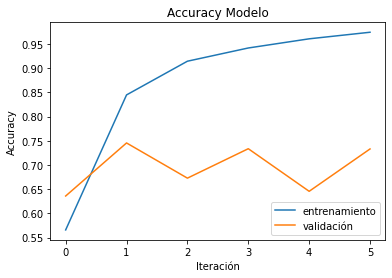

In [24]:
# Gráfica de la métrica de precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='lower right')
plt.show()

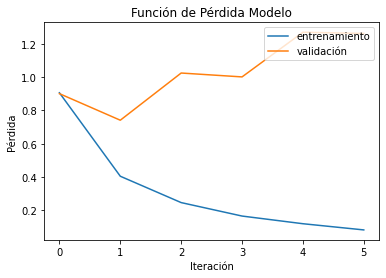

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de Pérdida Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')
plt.legend(['entrenamiento', 'validación'], loc='upper right')
plt.show()

# Evalucion del Modelo

In [59]:
model_loaded = load_model("/Users/usuario/OneDrive/Documentos/semestre 2021-3/ciencias de datos/final/model_jupyter.h5")

In [60]:
step_size_test=test_generator.n/test_generator.batch_size
result_evaluate =  model_loaded.evaluate_generator(test_generator,step_size_test,verbose=1)
print(result_evaluate)

<ipython-input-60-cec97c13445f>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result_evaluate =  model_loaded.evaluate_generator(test_generator,step_size_test,verbose=1)


4419/4419 [==============================] - 42s 9ms/step - loss: 0.2745 - accuracy: 0.9061
[0.2744711637496948, 0.906087338924408]


In [61]:
y_pred_prob =  model_loaded.predict_generator(test_generator, steps= step_size_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
test_labels_one_hot = to_categorical(test_generator.classes)

<ipython-input-61-cfc02af0603b>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_prob =  model_loaded.predict_generator(test_generator, steps= step_size_test)


In [62]:
print(y_pred_prob)
print(y_pred_classes)
print(test_labels_one_hot)

[[0.43366668 0.12834027 0.43799302]
 [0.48308083 0.14492649 0.37199268]
 [0.4862941  0.14045349 0.3732524 ]
 ...
 [0.0080185  0.01840582 0.97357565]
 [0.00798305 0.01886627 0.97315073]
 [0.00801789 0.01877146 0.9732107 ]]
[2 0 0 ... 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
